# Exploring Detroit Demolitions of Vacant Properties Accompanied with Linear Regression and Random Forest


---

An analysis was performed on Detroit's demolition dataset. Demolitions done by the Detroit Land Bank Authority or Detroit Building Authority since January 1, 2014. Projects listed in this dataset have a known price, demolition knock-down date, and demolition contractor. 







#### This analysis utilizes data science techniques, including:


*   Exploratory Data Analysis (EDA)

*   Visualization

*   Correlation Analysis

*   Linear Regression

*   Random Forest


#### Data source:

https://data.detroitmi.gov/Property-Parcels/Detroit-Demolitions/rv44-e9di

## Loading the Data

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformed to Github raw data for reporduction purposes. 
# Read the data into a Pandas DataFrame.
detDemos = pd.read_csv('https://raw.githubusercontent.com/WorldCapital/Detroit-Demolitions/master/Detroit_Demolitions.csv', parse_dates=[4])

## Exploring the Data

In [92]:
# Get some summaries of columns and data types.
print(detDemos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18764 entries, 0 to 18763
Data columns (total 16 columns):
Address                   18764 non-null object
Parcel ID                 18764 non-null object
Contractor Name           18764 non-null object
Price                     18764 non-null float64
Primary Funding Source    18764 non-null object
Demolition Date           18764 non-null object
Commercial Building       18764 non-null object
Council_District          18764 non-null int64
Neighborhood              18764 non-null object
Latitude                  18764 non-null float64
Longitude                 18764 non-null float64
Location                  18764 non-null object
Street Direction          845 non-null object
Street Number             18764 non-null int64
Street Name               18764 non-null object
Street Type               18513 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 2.3+ MB
None


18,764 dated demolitions in the city of Detroit. 

In [93]:
print(detDemos.head())

              Address   Parcel ID  ...    Street Name  Street Type
0  3617 Joseph Campau  11002780-1  ...  JOSEPH CAMPAU           St
1            457 Erle   01005500.  ...           ERLE           St
2    4462 Lillibridge   21042776.  ...    LILLIBRIDGE           St
3        11706 Meyers   18018714.  ...         MEYERS           Rd
4          18546 Hull   09019774.  ...           HULL           St

[5 rows x 16 columns]


In [0]:
detDemos.isna().sum()

Address                       0
Parcel ID                     0
Contractor Name               0
Price                         0
Primary Funding Source        0
Demolition Date               0
Commercial Building           0
Council_District              0
Neighborhood                  0
Latitude                      0
Longitude                     0
Location                      0
Street Direction          17919
Street Number                 0
Street Name                   0
Street Type                 251
dtype: int64

In [0]:
detDemos.fillna(0, inplace=True)

In [0]:
detDemos.describe()

,Price,Council_District,Latitude,Longitude,Street Number
count,1.876400e+04,18764.000000,18764.000000,18764.000000,18764.000000
mean,1.706243e+04,4.073705,42.390123,-83.101815,10518.849286
std,2.160791e+04,1.971673,0.036001,0.098948,6021.624403
min,1.000000e-02,1.000000,42.256238,-83.286724,10.000000
25%,1.128745e+04,3.000000,42.365458,-83.189740,5114.000000
50%,1.459750e+04,4.000000,42.393367,-83.110352,9959.500000
75%,1.895075e+04,6.000000,42.418284,-83.006633,15456.000000
max,1.373000e+06,7.000000,42.449627,-82.913284,26181.000000


The average price for all demolitions is 17,062.

### Contracting companies 

In [0]:
print(len(detDemos['Contractor Name'].unique()))

35


There are 35 different contractors working demolitions in Detroit. 

In [46]:
contractors = detDemos.groupby(['Contractor Name'], as_index=True)

# size gives the number of contracts per company
print(contractors.size())

Contractor Name
1 Way Service                             83
313 Construction, LLC                     40
ABC Demolition                           445
Able Demolition                         1995
Adamo Group, Inc.                       3355
BBEK Environmental                         1
Berkshire Development, Inc.               13
Blackstar                                  1
Blue Star                                716
Brown & Glo Wrecking                      23
Brown Environmental Construction         266
DMC Consultants                         2062
Den-Man Contractors                      582
Direct Construction Services              93
Dore & Associates                        189
Esso Wrecking Co.                        217
Farrow Group                             243
Futurenet Group                           88
GLO WRECKING CO                           18
Gayanga Co                               347
Homrich                                 3311
J Keith Construction                   

#### Top contractors for demolitions

In [0]:
detDemos['Contractor Name'].value_counts().head(10)

Adamo Group, Inc.                       3355
Homrich                                 3311
DMC Consultants                         2062
Able Demolition                         1995
Rickman Enterprise Group                1795
Salenbien Trucking & Excavating Inc.    1571
Blue Star                                716
Den-Man Contractors                      582
Smalley                                  577
ABC Demolition                           445
Name: Contractor Name, dtype: int64

In [91]:
print(detDemos['Price'].mean())


17062.434321040317


#### Neighborhoods with the highest demolitions

In [0]:
detDemos['Neighborhood'].value_counts().head(15)

Warrendale              842
Brightmoor              679
Outer Drive-Hayes       584
Holcomb Community       583
Claytown                527
Midwest                 482
Regent Park             406
Pulaski                 379
Chadsey Condon          373
Pilgrim Village         364
Morningside             347
Mapleridge              333
Nolan                   311
Fitzgerald/Marygrove    292
Airport Sub             291
Name: Neighborhood, dtype: int64

#### Top contractors with the largest prices




In [47]:
n=5
contractors_sum = contractors.sum();
top_n_contractors_df = contractors_sum.nlargest(n,'Price')
print(top_n_contractors_df)

top_n_contractor_names = top_n_contractors_df.index.values

top_n_contractors = detDemos[detDemos['Contractor Name'].isin(top_n_contractor_names)]

                                Price  ...  Street Number
Contractor Name                        ...               
Homrich                   58560947.83  ...       36817385
Adamo Group, Inc.         55608840.73  ...       37384555
Able Demolition           33363789.79  ...       21067048
DMC Consultants           32671667.51  ...       19181510
Rickman Enterprise Group  29669513.18  ...       18799498

[5 rows x 5 columns]


In [0]:
top_n_contractors.groupby(['Contractor Name']).size()

Contractor Name
Able Demolition             1995
Adamo Group, Inc.           3355
DMC Consultants             2062
Homrich                     3311
Rickman Enterprise Group    1795
dtype: int64

#### Mean prices of top contractors

In [0]:
top_n_contractors.groupby(['Contractor Name'])['Price'].mean()

Contractor Name
Able Demolition             16723.704155
Adamo Group, Inc.           16574.915270
DMC Consultants             15844.649617
Homrich                     17686.785814
Rickman Enterprise Group    16528.976702
Name: Price, dtype: float64

In [0]:
print(top_n_contractors['Price'].mean())


16765.83791660007


Average price for top contractors is $16,765.

## Visualization

Text(0.5, 1.0, 'Total Number (#) of Vacant Properties for Demolition by Neighborhood')

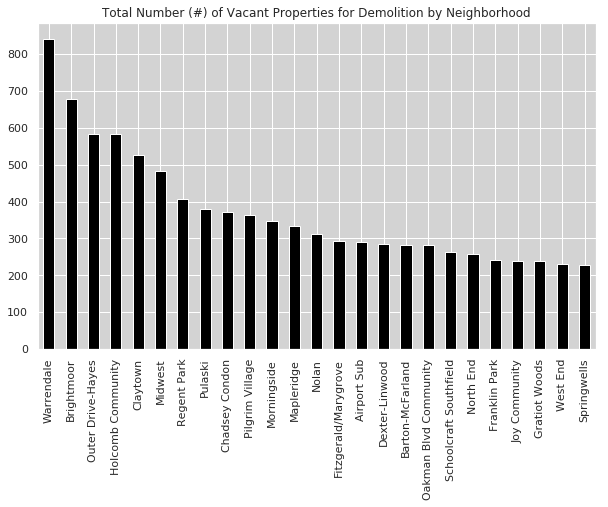

In [62]:
detDemos['Neighborhood'].value_counts().head(25).plot(kind = 'bar', figsize=(10,6), color=('black'))
plt.title('Total Number (#) of Vacant Properties for Demolition by Neighborhood')


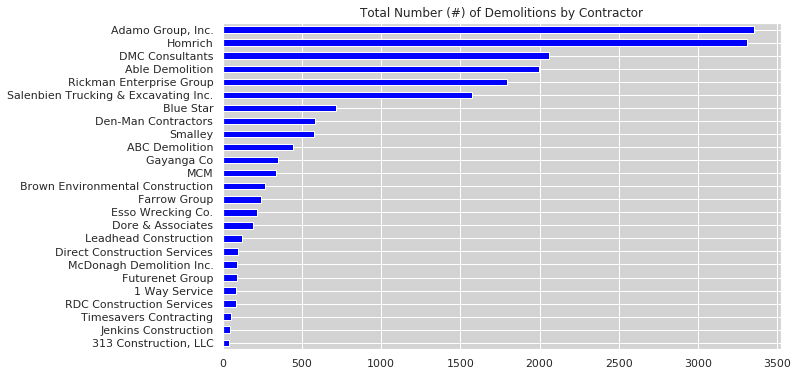

In [68]:
detDemos['Contractor Name'].value_counts().head(25).plot(kind = 'barh', figsize=(10,6), color=('blue'))
plt.title('Total Number (#) of Demolitions by Contractor')
plt.gca().invert_yaxis()


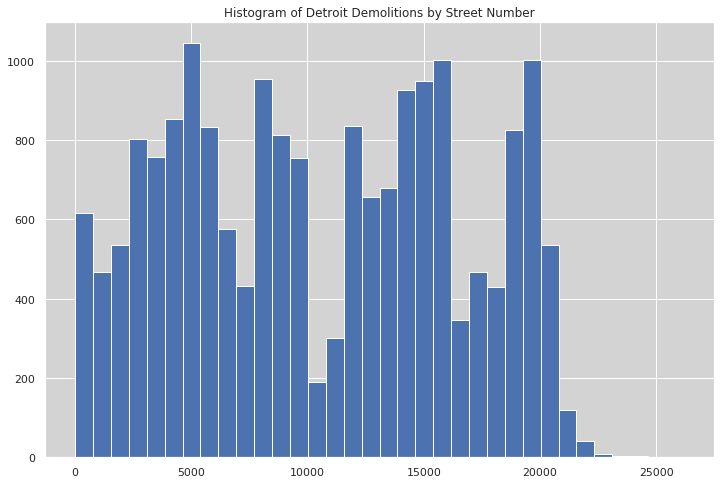

In [42]:

from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

rcParams['figure.figsize'] = 12, 8
seaborn.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})

a = detDemos['Street Number'] 

_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Detroit Demolitions by Street Number")
plt.show()






[Text(0, 0.5, 'Total Price'), Text(0.5, 0, 'Total Contracts')]

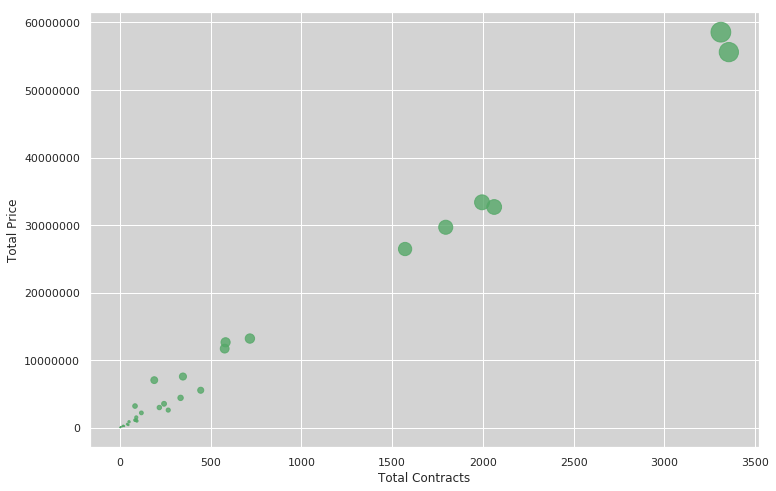

In [48]:

ax = sns.regplot(x=contractors.size(),fit_reg=False, y=contractors_sum['Price'], color="g", scatter_kws={"s":contractors_sum['Price']/150000})
# we reduce the size of the dot for the scatter plot by a factor of 100000 for good visibility
plt.ticklabel_format(style = 'plain')  # remove exponential labels with this setting
ax.set(xlabel='Total Contracts', ylabel='Total Price')

median price  14597.5
mean price  17062.434321040317


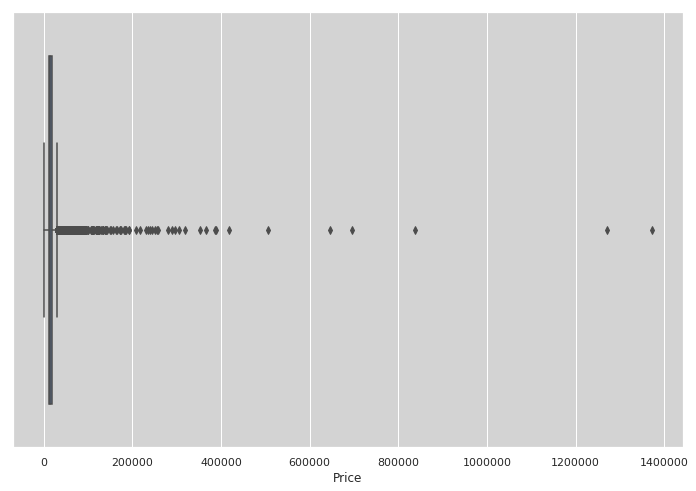

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
g = sns.boxplot(detDemos['Price'])
print("median price ", detDemos['Price'].median())
print("mean price ", detDemos['Price'].mean())

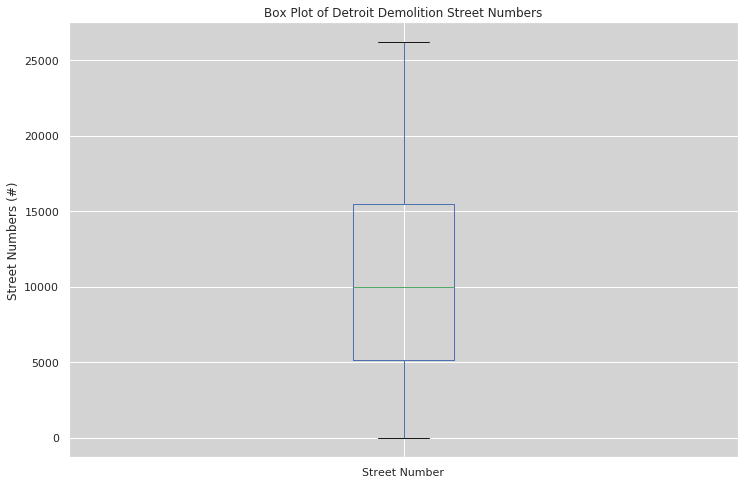

In [49]:
plt.title('Box Plot of Detroit Demolition Street Numbers')
plt.ylabel('Street Numbers (#)')
detDemos["Street Number"].plot.box();

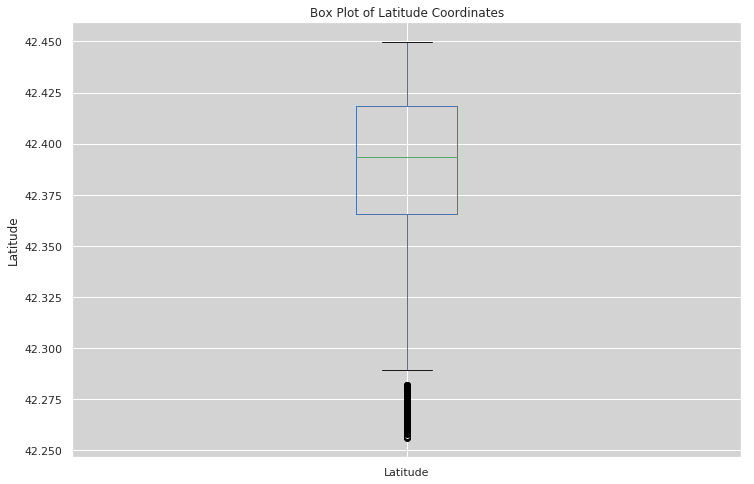

In [50]:
plt.title('Box Plot of Latitude Coordinates')
plt.ylabel('Latitude')
detDemos["Latitude"].plot.box();

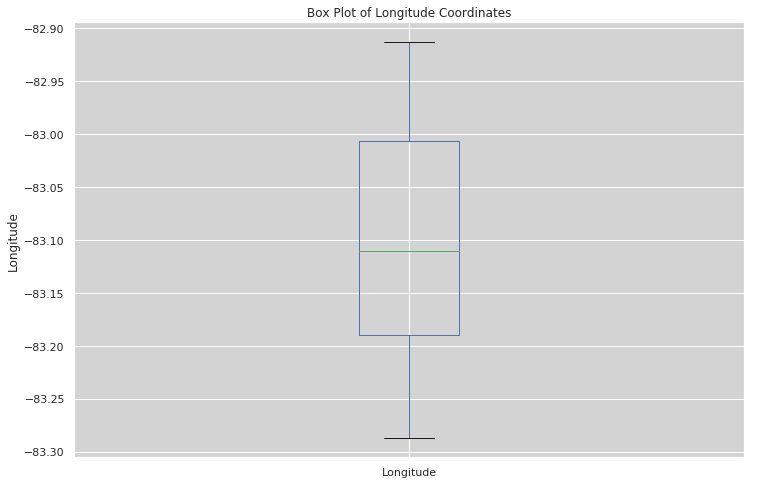

In [51]:
plt.title('Box Plot of Longitude Coordinates')
plt.ylabel('Longitude')
detDemos["Longitude"].plot.box();

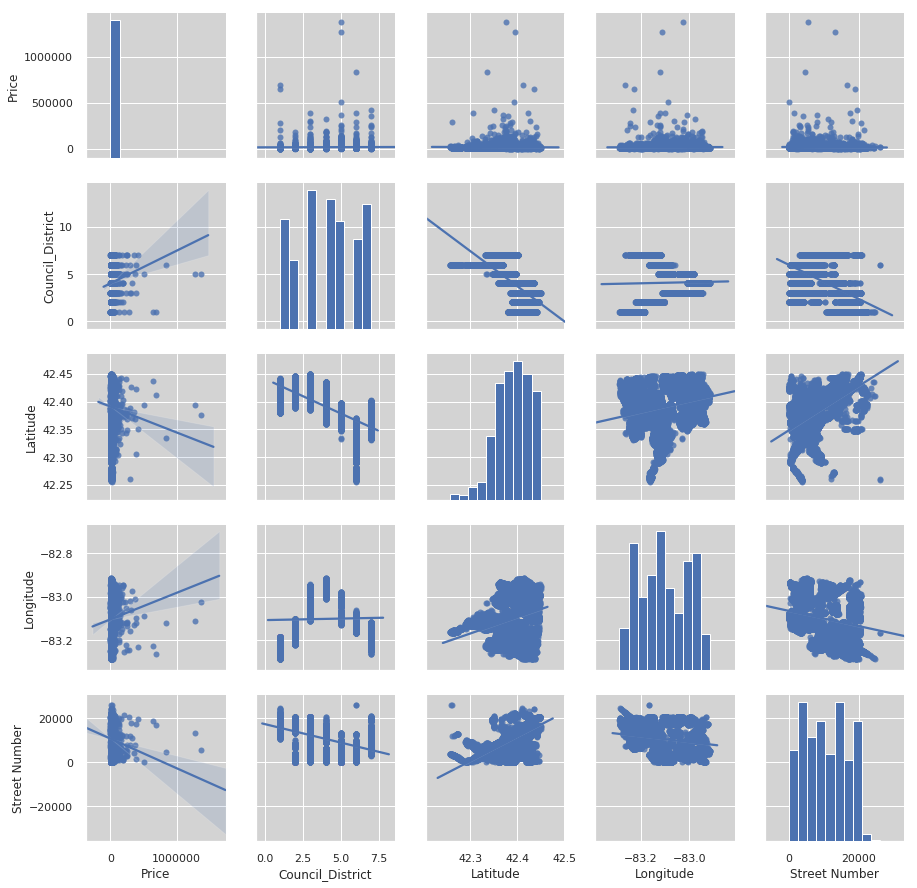

In [0]:
sns.pairplot(detDemos,kind="reg")
#plt.title('Correlation Pairplot of Michigan Income and Obesity')
plt.show()

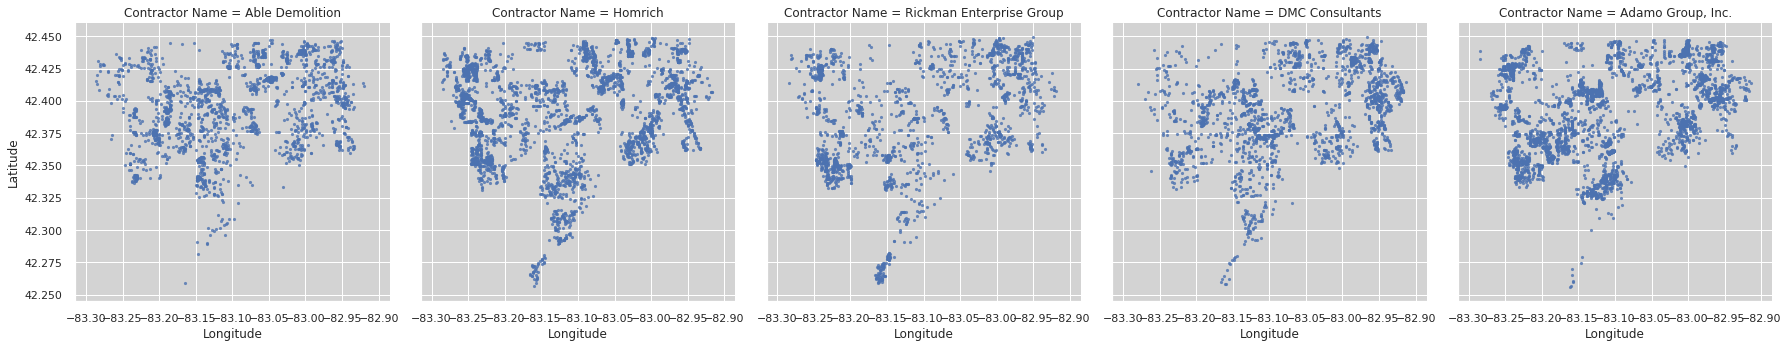

In [0]:
# Now to plot the geo distribution of the top n contractors demolition sites
top_n_contractors = detDemos[detDemos['Contractor Name'].isin(top_n_contractor_names)]
sns.lmplot(x='Longitude', y='Latitude', data=top_n_contractors,col="Contractor Name",
           fit_reg=False, # No regression line
           scatter_kws={"s": 10})   # Color for dots

plt.show()

### Comparison of resident vs commerical demolitions by top contractor

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


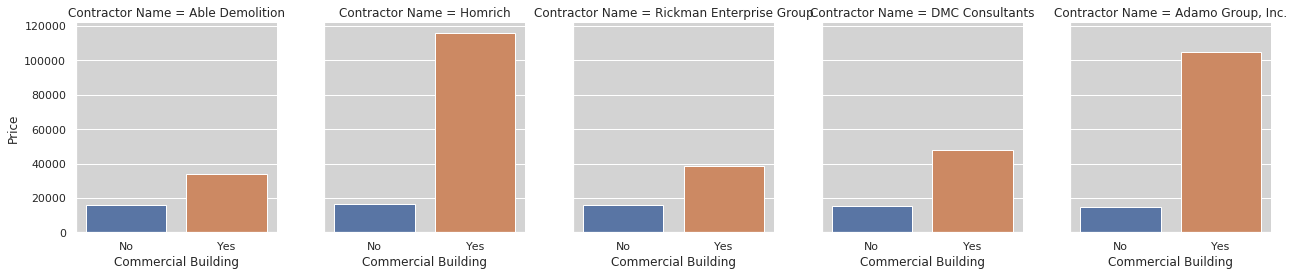

In [69]:
sns.factorplot(x="Commercial Building", y="Price",
                    col='Contractor Name',
                    ci=None,
                    data=detDemos[detDemos['Contractor Name'].isin(top_n_contractor_names)], kind="bar",
                    size=4, aspect=.9);

Commercial Building         No  Yes
Contractor Name                    
Able Demolition           1889  106
Adamo Group, Inc.         3287   68
DMC Consultants           2016   46
Homrich                   3265   46
Rickman Enterprise Group  1752   43


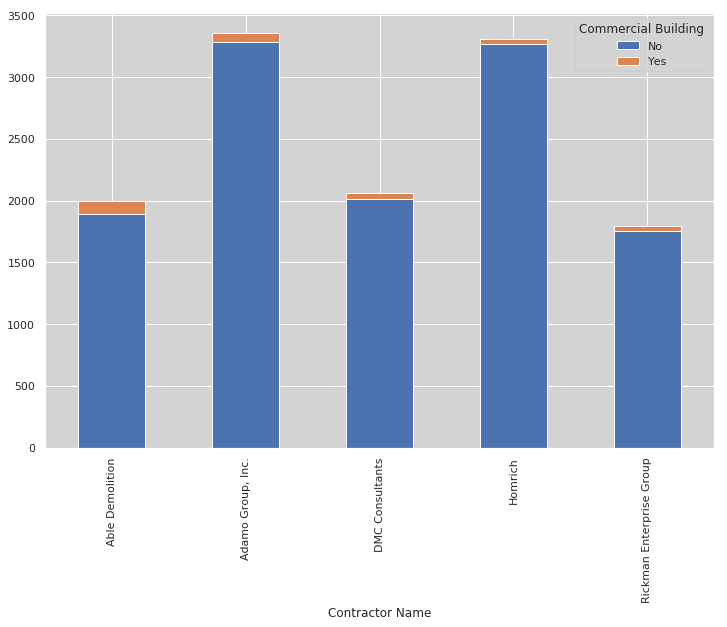

In [70]:
unstacked_df = top_n_contractors.groupby(['Contractor Name', 'Commercial Building'])['Contractor Name'].count().unstack('Commercial Building')
print(unstacked_df)
unstacked_df.plot(kind='bar', stacked=True)

Demolitions of top contractors indicate that the significant majority of demolitions occur on resident properties as opposed to commerical. 

## Correlation Analysis

In [0]:
detDemos.corr()

,Price,Council_District,Latitude,Longitude,Street Number
Price,1.000000,0.037963,-0.027912,0.026584,-0.048357
Council_District,0.037963,1.000000,-0.680564,0.027932,-0.549985
Latitude,-0.027912,-0.680564,1.000000,0.271072,0.661496
Longitude,0.026584,0.027932,0.271072,1.000000,-0.211485
Street Number,-0.048357,-0.549985,0.661496,-0.211485,1.000000


In [0]:
detDemos.corr()['Price'].sort_values(ascending=False)

Price               1.000000
Council_District    0.037963
Longitude           0.026584
Latitude           -0.027912
Street Number      -0.048357
Name: Price, dtype: float64

In [0]:
detDemos.corr()['Street Number'].sort_values(ascending=False)

Street Number       1.000000
Latitude            0.661496
Price              -0.048357
Longitude          -0.211485
Council_District   -0.549985
Name: Street Number, dtype: float64

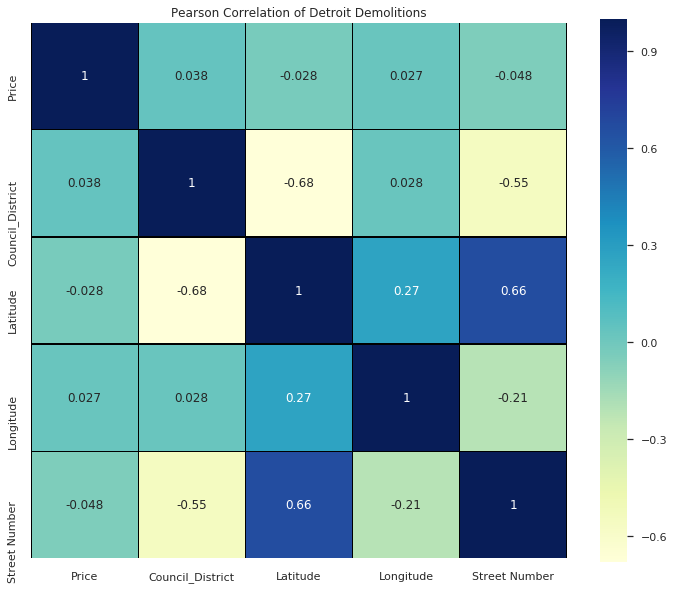

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Detroit Demolitions')

# Draw the heatmap using seaborn
sns.heatmap(detDemos.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

## Linear Regression

In [71]:
numerical_columns = detDemos.dtypes[detDemos.dtypes != 'object'].index
numerical_data = detDemos[numerical_columns]

# we drop aspect_ratio, as it doesn't provide any useful info
#numerical_data.drop('Neighborhood', axis=1, inplace=True)
numerical_data.head(2)

,Price,Council_District,Latitude,Longitude,Street Number
0,18180.00,5,42.357781,-83.032172,3617
1,28678.32,2,42.424571,-83.108035,457


In [0]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

train, test = train_test_split(numerical_data, test_size=0.2)
target_train = train.pop('Street Number')
target_test = test.pop('Street Number')

In [73]:
print('Train data: {} / {} = {}'.format(len(train), len(numerical_data), float(len(train)/len(numerical_data))))
print('Test data: {} / {} = {}'.format(len(test), len(numerical_data), float(len(test)/len(numerical_data))))

Train data: 15011 / 18764 = 0.7999893412918354
Test data: 3753 / 18764 = 0.20001065870816456


In [74]:
model = LinearRegression()
model.fit(train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction = model.predict(test)

Mean squared error: 13705298.87
Accuracy: 0.62


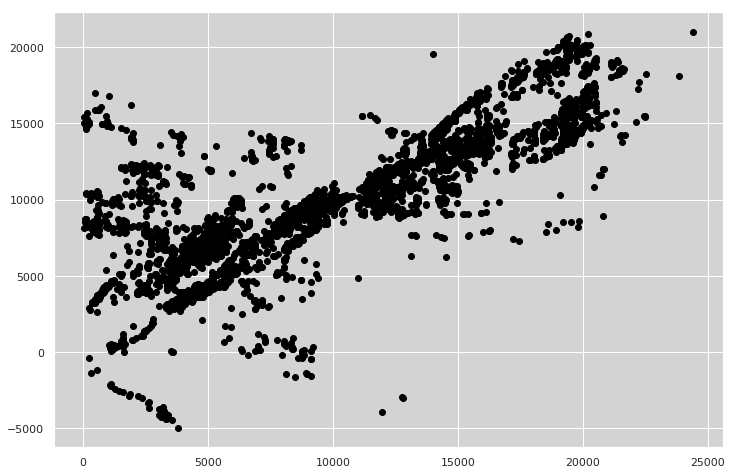

In [83]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, prediction))

# Explained variance score: 1 is perfect prediction
print('Accuracy: %.2f' % r2_score(target_test, prediction))

# Plot outputs
plt.scatter(target_test, prediction,  color='black')

line = mlines.Line2D([70, 71], [70, 71], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)


plt.show()

Linear regression 

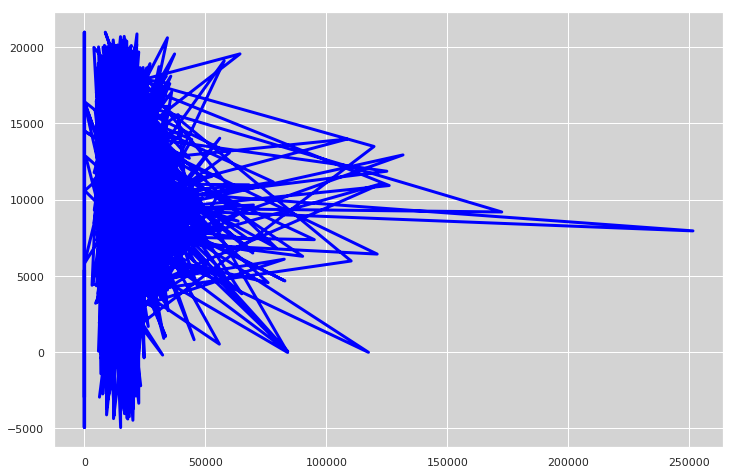

In [77]:

plt.plot(test, prediction, color='blue', linewidth=3)

In [0]:
y_mean = [np.mean(detDemos['Street Number'])]*len(detDemos)


## Random Forest

In [78]:
forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

forest.fit(train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [79]:
forest.feature_importances_

array([0.01109249, 0.5468173 , 0.26057541, 0.1815148 ])

In [0]:
forest_prediction = forest.predict(test)

Mean squared error: 2302625.75
Accuracy: 0.94


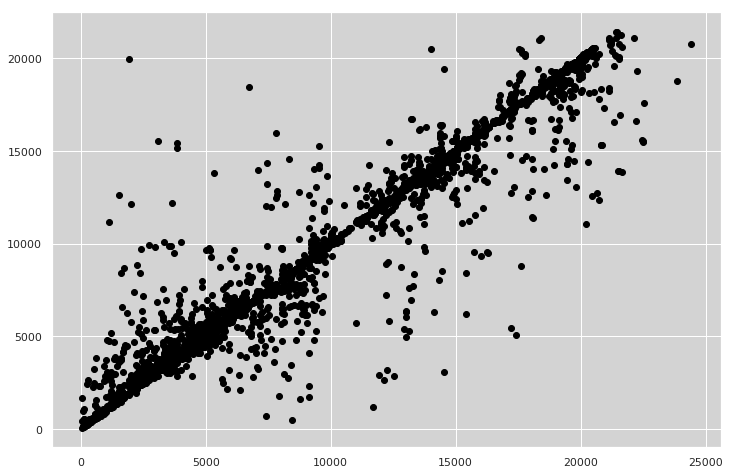

In [84]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, forest_prediction))

# Explained variance score: 1 is perfect prediction
print('Accuracy: %.2f' % r2_score(target_test, forest_prediction))

# Plot outputs
plt.scatter(target_test, forest_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

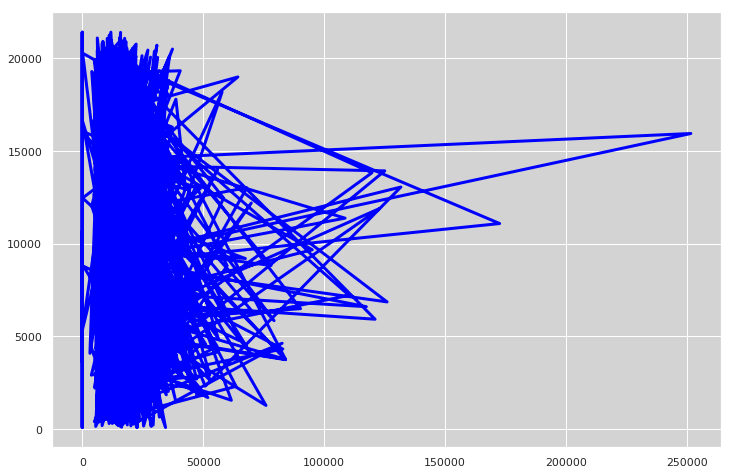

In [82]:
plt.plot(test, forest_prediction, color='blue', linewidth=3)


### Summary

Random Forest demonstrated an immense improvement of 32% from .62 in linear regression to .94 in random forest model. 

## Conclusion

---

An analysis was performed analyzing Detroit demolition data of vacant properties. The data can be found at the city of Detoit's Open Data Portal and is available for public download. The Detroit_Demolitions.csv has been available since January 14, 2016. As of August 20, 2019 there have been a total of 18,764 demolitions entries in Detroit.

In summary this analysis uncovered: 


*   Average price for vacant property demolition in Detroit is 17,062
. While the top contractors average $16,765.

*   The neighborhoods with the highest demolitions are Warrendale (842), Brightmoor (679), Outer Drive-Hayes (584), Holcomb Community (583), and Claytown (527).

*   Top contractors focus heavily on residental demolitions as opposed to commerical. 

*   Street Number and Latitude are correlated by 66%.

*   Linear regression provided low results of 62% accuracy. Whereas, random forest generated a much improved model of 94%.

